In [136]:
import seaborn as sns
import pandas as pd
import tester

In [137]:
df = pd.read_csv('winequality-red.csv')

In [138]:
y = df.quality
x = df.drop(columns=['quality'])

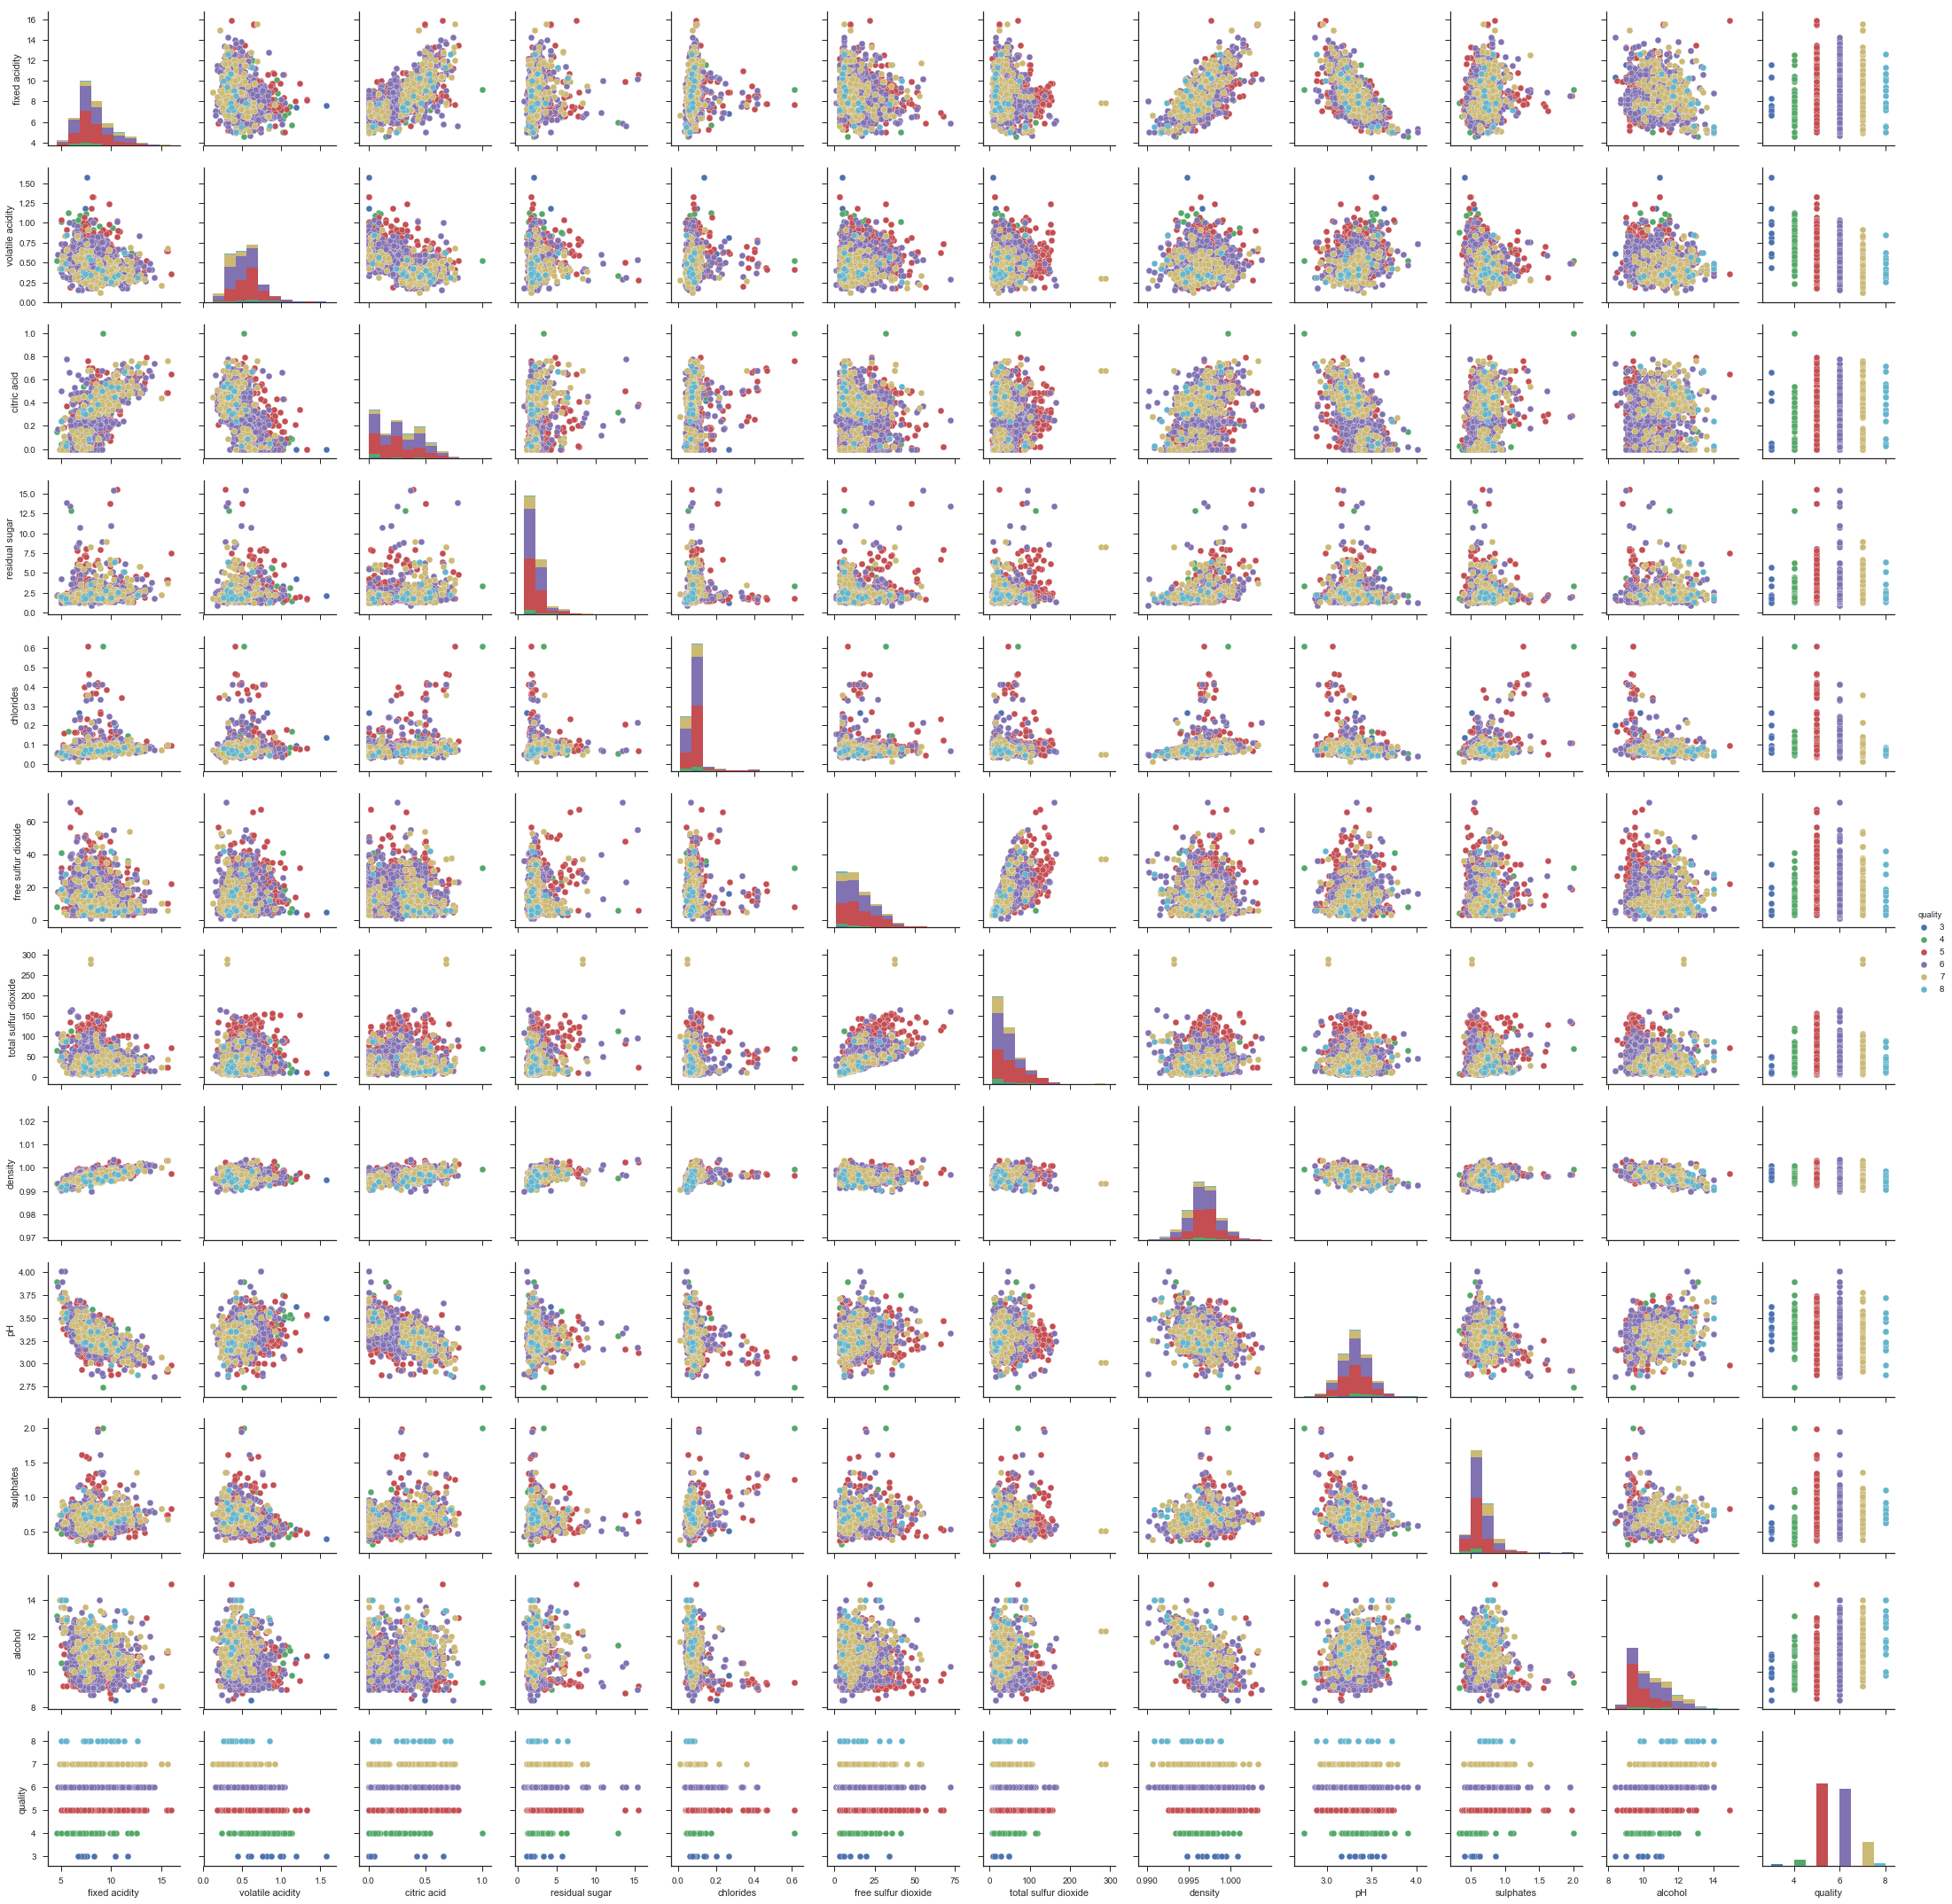

In [225]:
sns.set(style="ticks")
sns.pairplot(df, hue="quality")

In [5]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# x = sc.fit_transform(x)

In [6]:
# from sklearn import preprocessing
# from sklearn.decomposition import PCA

# pca = PCA(n_components=11)
# pca.fit_transform(x)

In [139]:
from sklearn.model_selection import train_test_split
x_test = x[-400:]
y_test = y[-400:]

x_train = x[:1199]
y_train = y[:1199]

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=42, shuffle=True)

In [140]:
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [212]:
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(random_state=0)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_test)
tester.evaluate(y_predict, (y_test))
# tester.cross_val(clf, df, y)
#     tester.cross_val_accuracy(clf, df, y, cv=10)

SSE = 194
Accuracy = 251
Accuracy percent = 62.74999999999999%


[194, 251, 0.6275]

In [224]:
from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor()
# SSE = 264
# Accuracy = 219
# Accuracy percent = 54.75%

regr = RandomForestRegressor(random_state=0, max_depth=9, min_samples_split=11)
# SSE = 241
# Accuracy = 213
# Accuracy percent = 53.25%

regr.fit(x_train, y_train)
y_predict = regr.predict(x_test)
y_predict = [int(i) for i in y_predict]
tester.evaluate(y_predict, (y_test))
# tester.cross_val(clf, df, y)
#     tester.cross_val_accuracy(clf, df, y, cv=10)

SSE = 241
Accuracy = 213
Accuracy percent = 53.25%


[241, 213, 0.5325]

In [227]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train, y_train)  
y_predict = clf.predict(x_test)
# y_predict = [int(i) for i in y_predict]
tester.evaluate(y_predict, (y_test))
# tester.cross_val(clf, df, y)
tester.cross_val_accuracy(clf, df, y, cv=10)

SSE = 313
Accuracy = 189
Accuracy percent = 47.25%
Accuracy: 0.72 (+/- 0.07)


In [144]:
from sklearn import svm
clf = svm.SVR()
clf.fit(x_train, y_train)  
y_predict = clf.predict(x_test)
y_predict = [int(i) for i in y_predict]
tester.evaluate(y_predict, (y_test))
# tester.cross_val(clf, df, y)
tester.cross_val_accuracy(clf, df, y, cv=10)

SSE = 319
Accuracy = 191
Accuracy percent = 47.75%
Accuracy: 0.67 (+/- 0.13)


In [145]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
import numpy as np
clf = NearestCentroid()
clf.fit(x_train, y_train)  
NearestCentroid(metric='euclidean', shrink_threshold=None)
y_predict=clf.predict(x_test)
y_predict = [int(i) for i in y_predict]
tester.evaluate(y_predict, (y_test))
# tester.cross_val(clf, df, y)
tester.cross_val_accuracy(clf, df, y, cv=10)

SSE = 1449
Accuracy = 104
Accuracy percent = 26.0%
Accuracy: 0.28 (+/- 0.09)


In [109]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(x_train, y_train) 
y_predict=clf.predict(x_test)
tester.evaluate(y_predict, (y_test))
# tester.cross_val(clf, df, y)
tester.cross_val_accuracy(clf, df, y, cv=10)

SSE = 787
Accuracy = 75
Accuracy percent = 18.75%
Accuracy: 0.46 (+/- 0.28)


C:\Users\bundi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\bundi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self),

In [110]:
# from sklearn import linear_model
# reg = linear_model.BayesianRidge()
# y_predict=reg.fit(x_train, y_train)
# print(type(x_train), type(x_test))
# tester.evaluate(list(y_predict), list(y_test))

In [241]:
y_predict = []
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0, max_depth =1)
clf.fit(x_train, y_train)  
y_predict=clf.predict(x_test)
tester.evaluate(list(y_predict), list(y_test))
# tester.cross_val(clf, df, y)
tester.cross_val_accuracy(clf, df, y, cv=10)

2
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
3
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
4
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
5
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
6
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
7
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
8
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
9
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
10
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)
11
SSE = 244
Accuracy = 238
Accuracy percent = 59.5%
Accuracy: 0.82 (+/- 0.01)


In [153]:
# y_predict = []
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_predict=clf.predict(x_test)
y_predict = [int(i) for i in y_predict]
tester.evaluate(list(y_predict), list(y_test))
# tester.cross_val(clf, df, y)
tester.cross_val_accuracy(clf, df, y, cv=10)

SSE = 352
Accuracy = 188
Accuracy percent = 47.0%
Accuracy: 1.00 (+/- 0.00)


In [154]:
# import matplotlib.pyplot as plt
# plt.plot([1,2,3], [1,2,3])

In [210]:
# Tune
# 56.25
from sklearn import svm
# clf = svm.SVC()
# SSE = 313
# Accuracy = 189
# Accuracy percent = 47.25%

clf = svm.SVC(kernel='linear')
# SSE = 204
# Accuracy = 249
# Accuracy percent = 62.25000000000001%
clf.fit(x_train, y_train)  
y_predict = clf.predict(x_test)
y_predict = [int(i) for i in y_predict]
tester.evaluate(y_predict, (y_test))
# tester.cross_val_accuracy(clf, df, y, cv=10)

SSE = 204
Accuracy = 249
Accuracy percent = 62.25000000000001%


[204, 249, 0.6225]

In [171]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_predict = regr.predict(x_test)
y_predict = [int(i) for i in y_predict]
print(tester.evaluate(y_predict, (y_test)))
# tester.cross_val_accuracy(regr, df, y, cv=10)

SSE = 262
Accuracy = 198
Accuracy percent = 49.5%
[262, 198, 0.495]
